# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

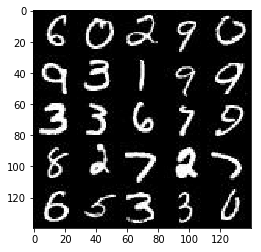

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

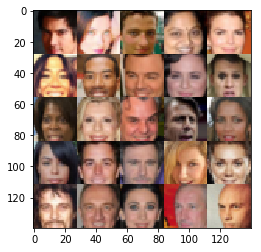

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    with tf.variable_scope("discriminator", reuse=reuse):
        conv1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        # 14x14x32
        
        conv2 = tf.layers.conv2d(lrelu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x64
        
        conv3 = tf.layers.conv2d(lrelu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x128

        conv4 = tf.layers.conv2d(lrelu3, 256, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(conv4, training=True)
        lrelu4 = tf.maximum(alpha * bn4, bn4)
        # 2x2x256
        
        flat = tf.reshape(lrelu4, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1, activation=None)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    reuse = False if is_train else True
    with tf.variable_scope("generator", reuse=reuse):
        # First fully connected layer
        fc1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        reshape = tf.reshape(fc1, (-1, 4, 4, 512))
        batch_norm1 = tf.layers.batch_normalization(reshape, training=is_train)
        lrelu1 = tf.maximum(alpha * batch_norm1, batch_norm1)
        # 4x4x512

        deconv1 = tf.layers.conv2d_transpose(lrelu1, 128, 4, strides=1, padding='valid')
        batch_norm2 = tf.layers.batch_normalization(deconv1, training=is_train)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        # 7x7x128
        
        deconv2 = tf.layers.conv2d_transpose(lrelu2, 64, 5, 2, 'same')
        batch_norm3 = tf.layers.batch_normalization(deconv2, training=is_train)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        # 14x14x64
        
        
        deconv3 = tf.layers.conv2d_transpose(lrelu3, 32, 5, 2, 'same')
        batch_norm4 = tf.layers.batch_normalization(deconv3, training=is_train)
        lrelu4 = tf.maximum(alpha * batch_norm4, batch_norm4)
        # 28x28x32
        
        # Logits
        logits = tf.layers.conv2d_transpose(lrelu4, out_channel_dim, 3, 1, 'same')
        # Output
        output = tf.tanh(logits)
        # 28x28xout_dim
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Build the model
    g_model = generator(input_z, out_channel_dim)

    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, out_channel_dim = data_shape
    input_ph, z_ph, lr_ph = model_inputs(image_width, image_height, out_channel_dim, z_dim)
    d_loss, g_loss = model_loss(input_ph, z_ph, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr_ph, beta1)
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                sess.run(d_train_opt, feed_dict={input_ph: batch_images, z_ph: batch_z, lr_ph:learning_rate})
                sess.run(g_train_opt, feed_dict={z_ph: batch_z, input_ph: batch_images, lr_ph:learning_rate})

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({z_ph: batch_z, input_ph: batch_images})
                    train_loss_g = g_loss.eval({z_ph: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % batch_size == 0:
                    show_generator_output(sess, 25, z_ph, out_channel_dim, data_image_mode)   
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0008... Generator Loss: 5.5365
Epoch 1/2... Discriminator Loss: 0.9089... Generator Loss: 0.5648
Epoch 1/2... Discriminator Loss: 0.6889... Generator Loss: 1.0312
Epoch 1/2... Discriminator Loss: 1.8182... Generator Loss: 0.3219
Epoch 1/2... Discriminator Loss: 1.0667... Generator Loss: 1.9703
Epoch 1/2... Discriminator Loss: 1.0732... Generator Loss: 2.1129


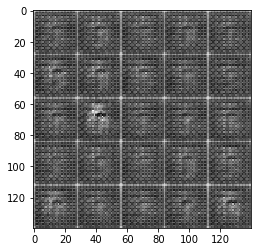

Epoch 1/2... Discriminator Loss: 1.6537... Generator Loss: 0.5531
Epoch 1/2... Discriminator Loss: 0.9538... Generator Loss: 0.9462
Epoch 1/2... Discriminator Loss: 1.4025... Generator Loss: 0.4682
Epoch 1/2... Discriminator Loss: 1.2364... Generator Loss: 0.5061
Epoch 1/2... Discriminator Loss: 1.3750... Generator Loss: 0.4270
Epoch 1/2... Discriminator Loss: 0.8534... Generator Loss: 2.5613


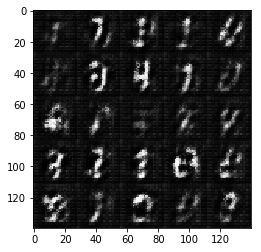

Epoch 1/2... Discriminator Loss: 1.1225... Generator Loss: 1.2270
Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 0.9246
Epoch 1/2... Discriminator Loss: 1.2047... Generator Loss: 0.8626
Epoch 1/2... Discriminator Loss: 0.8820... Generator Loss: 0.9428
Epoch 1/2... Discriminator Loss: 0.4562... Generator Loss: 1.3162
Epoch 1/2... Discriminator Loss: 1.2339... Generator Loss: 1.3172
Epoch 1/2... Discriminator Loss: 0.3859... Generator Loss: 1.2106


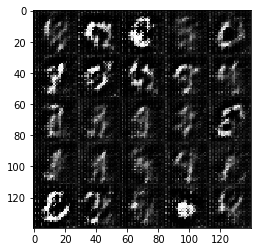

Epoch 1/2... Discriminator Loss: 0.5178... Generator Loss: 1.4868
Epoch 1/2... Discriminator Loss: 0.3892... Generator Loss: 1.3993
Epoch 1/2... Discriminator Loss: 0.7751... Generator Loss: 2.1050
Epoch 1/2... Discriminator Loss: 1.9266... Generator Loss: 1.8872
Epoch 1/2... Discriminator Loss: 0.1681... Generator Loss: 2.6161
Epoch 1/2... Discriminator Loss: 2.3310... Generator Loss: 0.1182


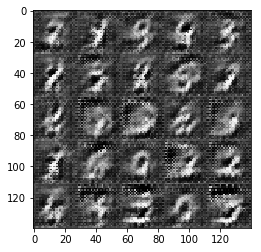

Epoch 1/2... Discriminator Loss: 0.7046... Generator Loss: 1.9026
Epoch 1/2... Discriminator Loss: 0.0708... Generator Loss: 3.8837
Epoch 1/2... Discriminator Loss: 1.1956... Generator Loss: 1.2040
Epoch 1/2... Discriminator Loss: 1.2301... Generator Loss: 0.7037
Epoch 1/2... Discriminator Loss: 1.4250... Generator Loss: 0.5159
Epoch 1/2... Discriminator Loss: 1.2324... Generator Loss: 0.8155
Epoch 1/2... Discriminator Loss: 1.3063... Generator Loss: 0.9561


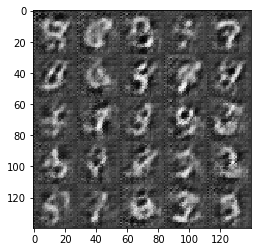

Epoch 1/2... Discriminator Loss: 1.3595... Generator Loss: 0.9524
Epoch 1/2... Discriminator Loss: 1.3420... Generator Loss: 0.5661
Epoch 1/2... Discriminator Loss: 1.1636... Generator Loss: 0.7919
Epoch 1/2... Discriminator Loss: 1.0099... Generator Loss: 0.9817
Epoch 1/2... Discriminator Loss: 0.8446... Generator Loss: 1.2358
Epoch 1/2... Discriminator Loss: 1.4666... Generator Loss: 0.5186


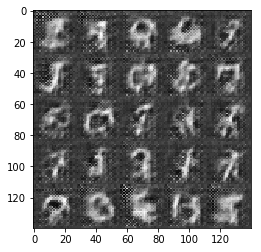

Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.4787
Epoch 1/2... Discriminator Loss: 2.1414... Generator Loss: 0.1755
Epoch 1/2... Discriminator Loss: 0.2480... Generator Loss: 2.7411
Epoch 1/2... Discriminator Loss: 1.2429... Generator Loss: 0.4526
Epoch 1/2... Discriminator Loss: 0.2180... Generator Loss: 2.4692
Epoch 1/2... Discriminator Loss: 0.0852... Generator Loss: 4.1527


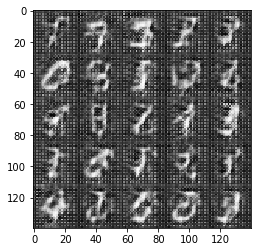

Epoch 1/2... Discriminator Loss: 1.6334... Generator Loss: 0.3641
Epoch 1/2... Discriminator Loss: 1.2323... Generator Loss: 1.2740
Epoch 1/2... Discriminator Loss: 1.0758... Generator Loss: 1.2127
Epoch 1/2... Discriminator Loss: 1.1238... Generator Loss: 1.3679
Epoch 1/2... Discriminator Loss: 0.9489... Generator Loss: 3.2252
Epoch 1/2... Discriminator Loss: 0.1458... Generator Loss: 3.5335
Epoch 1/2... Discriminator Loss: 0.4322... Generator Loss: 1.4054


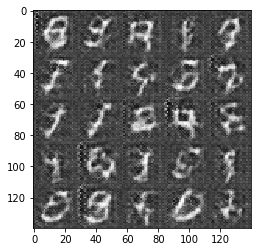

Epoch 1/2... Discriminator Loss: 0.1890... Generator Loss: 2.4150
Epoch 1/2... Discriminator Loss: 0.6402... Generator Loss: 1.5215
Epoch 1/2... Discriminator Loss: 0.6378... Generator Loss: 1.9969
Epoch 1/2... Discriminator Loss: 0.8624... Generator Loss: 0.7873
Epoch 1/2... Discriminator Loss: 0.1363... Generator Loss: 2.4018
Epoch 1/2... Discriminator Loss: 1.1631... Generator Loss: 1.0080


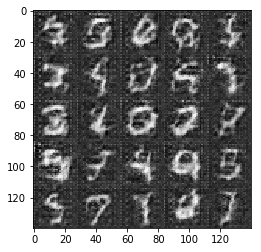

Epoch 1/2... Discriminator Loss: 0.7848... Generator Loss: 3.4471
Epoch 1/2... Discriminator Loss: 0.4345... Generator Loss: 2.0466
Epoch 1/2... Discriminator Loss: 0.1626... Generator Loss: 3.3008
Epoch 1/2... Discriminator Loss: 0.4785... Generator Loss: 1.7894
Epoch 1/2... Discriminator Loss: 0.8346... Generator Loss: 1.8835
Epoch 1/2... Discriminator Loss: 0.6877... Generator Loss: 4.4922
Epoch 1/2... Discriminator Loss: 0.1578... Generator Loss: 3.1810


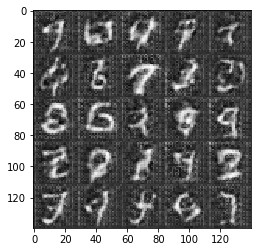

Epoch 1/2... Discriminator Loss: 0.1520... Generator Loss: 2.4870
Epoch 1/2... Discriminator Loss: 2.7581... Generator Loss: 4.1440
Epoch 1/2... Discriminator Loss: 0.1060... Generator Loss: 4.1366
Epoch 1/2... Discriminator Loss: 0.1667... Generator Loss: 2.3700
Epoch 1/2... Discriminator Loss: 0.0669... Generator Loss: 3.5247
Epoch 1/2... Discriminator Loss: 0.0803... Generator Loss: 3.1084


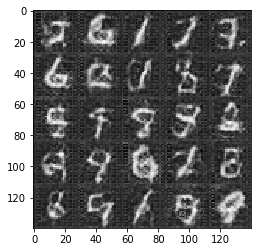

Epoch 1/2... Discriminator Loss: 0.9126... Generator Loss: 0.9028
Epoch 1/2... Discriminator Loss: 0.8901... Generator Loss: 1.0248
Epoch 1/2... Discriminator Loss: 1.7723... Generator Loss: 0.2324
Epoch 1/2... Discriminator Loss: 0.3150... Generator Loss: 2.6303
Epoch 1/2... Discriminator Loss: 0.4543... Generator Loss: 2.5571
Epoch 1/2... Discriminator Loss: 1.3256... Generator Loss: 1.0109


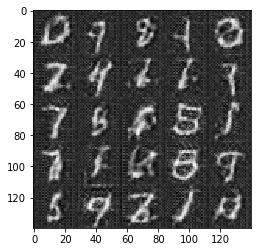

Epoch 1/2... Discriminator Loss: 0.5655... Generator Loss: 1.7655
Epoch 1/2... Discriminator Loss: 2.1811... Generator Loss: 0.1918
Epoch 1/2... Discriminator Loss: 0.5868... Generator Loss: 0.9692
Epoch 1/2... Discriminator Loss: 0.7273... Generator Loss: 1.2801
Epoch 1/2... Discriminator Loss: 0.1930... Generator Loss: 3.5235
Epoch 1/2... Discriminator Loss: 0.7220... Generator Loss: 1.0458
Epoch 1/2... Discriminator Loss: 0.3871... Generator Loss: 1.5779


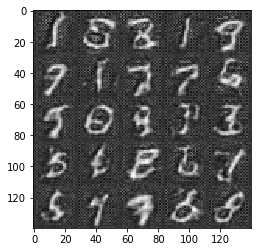

Epoch 1/2... Discriminator Loss: 0.2060... Generator Loss: 2.0080
Epoch 1/2... Discriminator Loss: 0.1611... Generator Loss: 2.1884
Epoch 1/2... Discriminator Loss: 0.0666... Generator Loss: 3.4922
Epoch 1/2... Discriminator Loss: 0.0365... Generator Loss: 6.0479
Epoch 1/2... Discriminator Loss: 2.5933... Generator Loss: 3.4835
Epoch 1/2... Discriminator Loss: 0.5575... Generator Loss: 2.7305


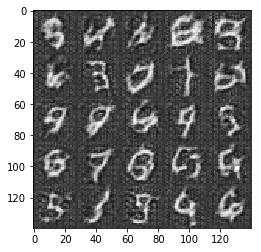

Epoch 1/2... Discriminator Loss: 1.8361... Generator Loss: 0.2162
Epoch 1/2... Discriminator Loss: 0.2057... Generator Loss: 2.3417
Epoch 1/2... Discriminator Loss: 1.7569... Generator Loss: 3.3645
Epoch 1/2... Discriminator Loss: 0.5794... Generator Loss: 1.5882
Epoch 2/2... Discriminator Loss: 0.3477... Generator Loss: 1.5525
Epoch 2/2... Discriminator Loss: 0.0875... Generator Loss: 3.4152
Epoch 2/2... Discriminator Loss: 0.1029... Generator Loss: 4.1049


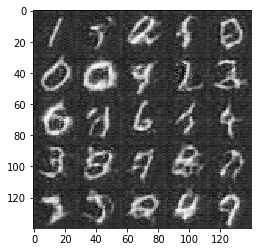

Epoch 2/2... Discriminator Loss: 0.2845... Generator Loss: 1.5457
Epoch 2/2... Discriminator Loss: 1.3923... Generator Loss: 0.9591
Epoch 2/2... Discriminator Loss: 0.8751... Generator Loss: 2.0085
Epoch 2/2... Discriminator Loss: 1.0042... Generator Loss: 3.1956
Epoch 2/2... Discriminator Loss: 2.1794... Generator Loss: 0.1797
Epoch 2/2... Discriminator Loss: 0.2938... Generator Loss: 1.7980


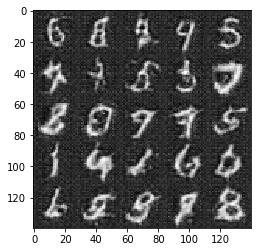

Epoch 2/2... Discriminator Loss: 0.2447... Generator Loss: 1.9841
Epoch 2/2... Discriminator Loss: 0.5238... Generator Loss: 3.1905
Epoch 2/2... Discriminator Loss: 0.6608... Generator Loss: 2.4955
Epoch 2/2... Discriminator Loss: 1.8677... Generator Loss: 0.2047
Epoch 2/2... Discriminator Loss: 0.3984... Generator Loss: 1.3777
Epoch 2/2... Discriminator Loss: 0.1955... Generator Loss: 2.0713


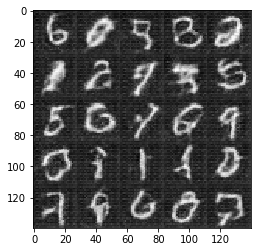

Epoch 2/2... Discriminator Loss: 1.1194... Generator Loss: 0.4591
Epoch 2/2... Discriminator Loss: 3.2059... Generator Loss: 4.4120
Epoch 2/2... Discriminator Loss: 0.6691... Generator Loss: 0.8494
Epoch 2/2... Discriminator Loss: 0.1434... Generator Loss: 3.2068
Epoch 2/2... Discriminator Loss: 0.2413... Generator Loss: 1.9171
Epoch 2/2... Discriminator Loss: 2.8776... Generator Loss: 3.6608
Epoch 2/2... Discriminator Loss: 0.2189... Generator Loss: 2.6779


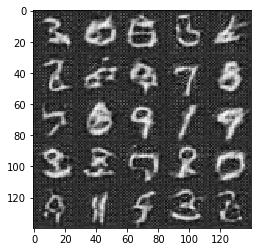

Epoch 2/2... Discriminator Loss: 0.0599... Generator Loss: 3.9242
Epoch 2/2... Discriminator Loss: 1.1294... Generator Loss: 1.4293
Epoch 2/2... Discriminator Loss: 1.3209... Generator Loss: 0.3841
Epoch 2/2... Discriminator Loss: 1.1232... Generator Loss: 0.5711
Epoch 2/2... Discriminator Loss: 0.6465... Generator Loss: 1.0618
Epoch 2/2... Discriminator Loss: 0.5802... Generator Loss: 1.1458


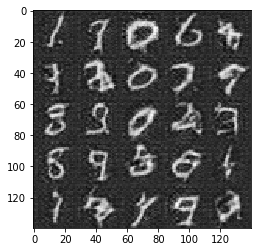

Epoch 2/2... Discriminator Loss: 0.4635... Generator Loss: 1.2631
Epoch 2/2... Discriminator Loss: 0.5396... Generator Loss: 4.6551
Epoch 2/2... Discriminator Loss: 0.5048... Generator Loss: 1.2892
Epoch 2/2... Discriminator Loss: 0.2390... Generator Loss: 3.6374
Epoch 2/2... Discriminator Loss: 0.0962... Generator Loss: 2.8545
Epoch 2/2... Discriminator Loss: 0.5526... Generator Loss: 1.5238
Epoch 2/2... Discriminator Loss: 0.2882... Generator Loss: 1.5588


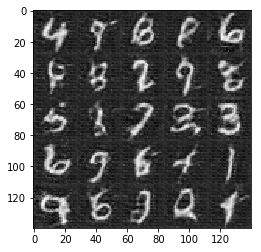

Epoch 2/2... Discriminator Loss: 0.0479... Generator Loss: 4.4984
Epoch 2/2... Discriminator Loss: 1.7029... Generator Loss: 3.1022
Epoch 2/2... Discriminator Loss: 0.2690... Generator Loss: 1.9554
Epoch 2/2... Discriminator Loss: 1.4592... Generator Loss: 0.3370
Epoch 2/2... Discriminator Loss: 0.4842... Generator Loss: 2.0238
Epoch 2/2... Discriminator Loss: 0.2043... Generator Loss: 5.1707


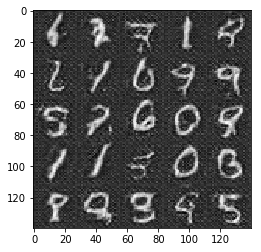

Epoch 2/2... Discriminator Loss: 1.9662... Generator Loss: 4.3678
Epoch 2/2... Discriminator Loss: 0.7682... Generator Loss: 0.7175
Epoch 2/2... Discriminator Loss: 0.1965... Generator Loss: 2.0406
Epoch 2/2... Discriminator Loss: 0.2562... Generator Loss: 2.1836
Epoch 2/2... Discriminator Loss: 1.6399... Generator Loss: 0.3189
Epoch 2/2... Discriminator Loss: 0.5418... Generator Loss: 1.0930


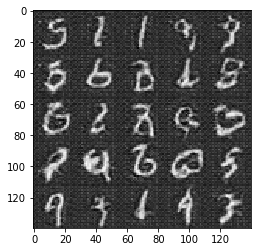

Epoch 2/2... Discriminator Loss: 2.6956... Generator Loss: 0.0871
Epoch 2/2... Discriminator Loss: 0.2005... Generator Loss: 2.2750
Epoch 2/2... Discriminator Loss: 1.7708... Generator Loss: 3.5512
Epoch 2/2... Discriminator Loss: 0.8333... Generator Loss: 1.0213
Epoch 2/2... Discriminator Loss: 0.7324... Generator Loss: 3.2095
Epoch 2/2... Discriminator Loss: 0.4757... Generator Loss: 3.4912
Epoch 2/2... Discriminator Loss: 0.1482... Generator Loss: 3.2541


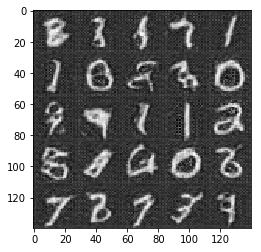

Epoch 2/2... Discriminator Loss: 0.1004... Generator Loss: 2.7300
Epoch 2/2... Discriminator Loss: 1.2587... Generator Loss: 0.4235
Epoch 2/2... Discriminator Loss: 0.4078... Generator Loss: 1.7525
Epoch 2/2... Discriminator Loss: 1.8883... Generator Loss: 0.1901
Epoch 2/2... Discriminator Loss: 0.9402... Generator Loss: 1.1062
Epoch 2/2... Discriminator Loss: 0.6805... Generator Loss: 0.8360


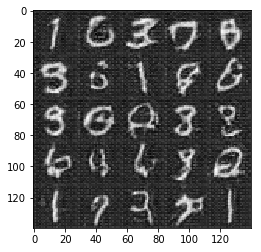

Epoch 2/2... Discriminator Loss: 0.1580... Generator Loss: 2.4573
Epoch 2/2... Discriminator Loss: 0.8972... Generator Loss: 1.3207
Epoch 2/2... Discriminator Loss: 0.2107... Generator Loss: 1.9856
Epoch 2/2... Discriminator Loss: 3.1349... Generator Loss: 0.0667
Epoch 2/2... Discriminator Loss: 1.4831... Generator Loss: 1.7840
Epoch 2/2... Discriminator Loss: 0.3158... Generator Loss: 3.9866
Epoch 2/2... Discriminator Loss: 0.1749... Generator Loss: 2.0514


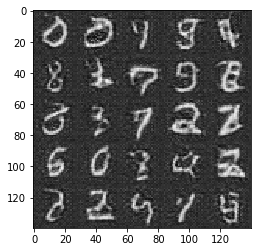

Epoch 2/2... Discriminator Loss: 0.0980... Generator Loss: 3.6170
Epoch 2/2... Discriminator Loss: 0.5028... Generator Loss: 1.0939
Epoch 2/2... Discriminator Loss: 0.6419... Generator Loss: 4.3563
Epoch 2/2... Discriminator Loss: 0.2153... Generator Loss: 3.2850
Epoch 2/2... Discriminator Loss: 0.1089... Generator Loss: 2.9475
Epoch 2/2... Discriminator Loss: 0.0332... Generator Loss: 4.5905


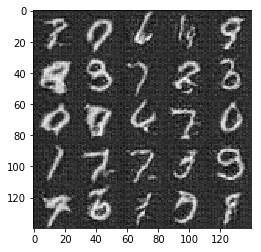

Epoch 2/2... Discriminator Loss: 1.8794... Generator Loss: 3.2012
Epoch 2/2... Discriminator Loss: 1.9999... Generator Loss: 0.1819
Epoch 2/2... Discriminator Loss: 1.3239... Generator Loss: 0.4003
Epoch 2/2... Discriminator Loss: 0.4132... Generator Loss: 2.1216
Epoch 2/2... Discriminator Loss: 0.4314... Generator Loss: 1.2227
Epoch 2/2... Discriminator Loss: 0.1912... Generator Loss: 4.6965


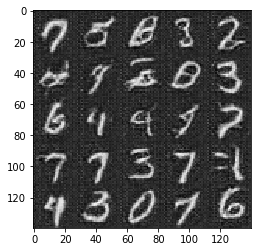

Epoch 2/2... Discriminator Loss: 0.0886... Generator Loss: 3.0486
Epoch 2/2... Discriminator Loss: 0.0938... Generator Loss: 3.2165
Epoch 2/2... Discriminator Loss: 1.1188... Generator Loss: 1.0159
Epoch 2/2... Discriminator Loss: 0.4222... Generator Loss: 1.5180
Epoch 2/2... Discriminator Loss: 1.5726... Generator Loss: 0.3097
Epoch 2/2... Discriminator Loss: 1.1708... Generator Loss: 0.5294
Epoch 2/2... Discriminator Loss: 0.2704... Generator Loss: 2.1536


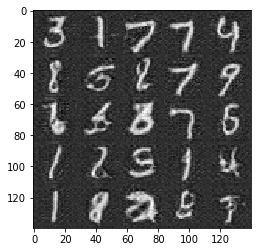

Epoch 2/2... Discriminator Loss: 3.2015... Generator Loss: 0.0806
Epoch 2/2... Discriminator Loss: 0.5630... Generator Loss: 1.4867
Epoch 2/2... Discriminator Loss: 0.1831... Generator Loss: 2.7629
Epoch 2/2... Discriminator Loss: 0.8500... Generator Loss: 1.0485
Epoch 2/2... Discriminator Loss: 0.2961... Generator Loss: 1.6668
Epoch 2/2... Discriminator Loss: 0.4828... Generator Loss: 1.1896


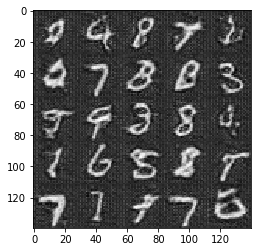

Epoch 2/2... Discriminator Loss: 0.6213... Generator Loss: 2.4483
Epoch 2/2... Discriminator Loss: 0.1698... Generator Loss: 2.2366


In [12]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.3607... Generator Loss: 0.0386
Epoch 1/1... Discriminator Loss: 0.7857... Generator Loss: 1.5792
Epoch 1/1... Discriminator Loss: 1.0027... Generator Loss: 0.5678
Epoch 1/1... Discriminator Loss: 1.4564... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 1.7852
Epoch 1/1... Discriminator Loss: 2.0387... Generator Loss: 0.2101


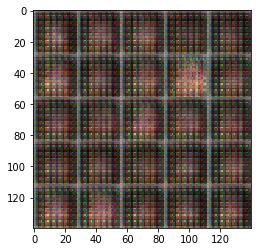

Epoch 1/1... Discriminator Loss: 1.5669... Generator Loss: 0.3437
Epoch 1/1... Discriminator Loss: 1.1637... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 0.8210... Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 0.5182... Generator Loss: 1.0548
Epoch 1/1... Discriminator Loss: 2.2850... Generator Loss: 2.1539
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 1.4669


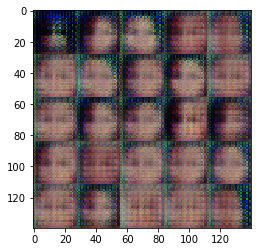

Epoch 1/1... Discriminator Loss: 0.9234... Generator Loss: 1.5905
Epoch 1/1... Discriminator Loss: 0.7068... Generator Loss: 1.9357
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 1.5325
Epoch 1/1... Discriminator Loss: 1.9203... Generator Loss: 2.6774
Epoch 1/1... Discriminator Loss: 0.3133... Generator Loss: 1.5766
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 1.6102
Epoch 1/1... Discriminator Loss: 1.9700... Generator Loss: 0.3133


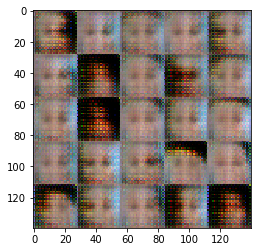

Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.3444
Epoch 1/1... Discriminator Loss: 0.3433... Generator Loss: 1.8108
Epoch 1/1... Discriminator Loss: 0.8548... Generator Loss: 1.7799
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.6493
Epoch 1/1... Discriminator Loss: 0.3390... Generator Loss: 2.0166
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 1.0807


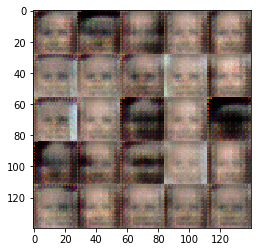

Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 0.4637... Generator Loss: 1.3506
Epoch 1/1... Discriminator Loss: 0.7185... Generator Loss: 1.0848
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 2.1109
Epoch 1/1... Discriminator Loss: 0.6643... Generator Loss: 1.3601
Epoch 1/1... Discriminator Loss: 1.6447... Generator Loss: 0.3589
Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 0.5679


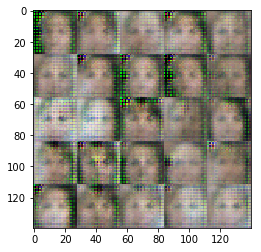

Epoch 1/1... Discriminator Loss: 2.1577... Generator Loss: 0.1702
Epoch 1/1... Discriminator Loss: 0.6633... Generator Loss: 0.9271
Epoch 1/1... Discriminator Loss: 0.8068... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 2.1220... Generator Loss: 0.1526
Epoch 1/1... Discriminator Loss: 1.9233... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 0.7028... Generator Loss: 1.1741


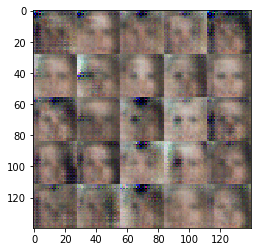

Epoch 1/1... Discriminator Loss: 1.9273... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.7830
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.2862... Generator Loss: 0.7382


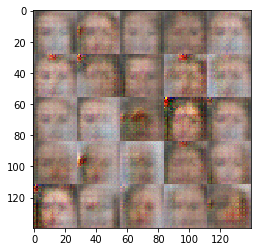

Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.6146... Generator Loss: 0.2877
Epoch 1/1... Discriminator Loss: 2.6112... Generator Loss: 0.0860
Epoch 1/1... Discriminator Loss: 0.5889... Generator Loss: 1.4512
Epoch 1/1... Discriminator Loss: 0.1908... Generator Loss: 2.1196
Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 2.7707
Epoch 1/1... Discriminator Loss: 2.3405... Generator Loss: 2.5672


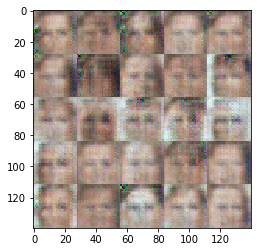

Epoch 1/1... Discriminator Loss: 1.5236... Generator Loss: 0.5667
Epoch 1/1... Discriminator Loss: 1.3654... Generator Loss: 0.5614
Epoch 1/1... Discriminator Loss: 0.6478... Generator Loss: 1.0171
Epoch 1/1... Discriminator Loss: 0.5671... Generator Loss: 1.2387
Epoch 1/1... Discriminator Loss: 0.5523... Generator Loss: 1.1046
Epoch 1/1... Discriminator Loss: 1.4991... Generator Loss: 1.8180


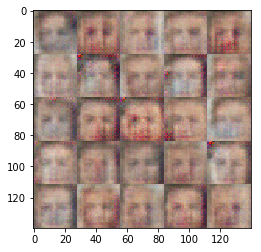

Epoch 1/1... Discriminator Loss: 0.1066... Generator Loss: 2.6422
Epoch 1/1... Discriminator Loss: 0.0437... Generator Loss: 3.6999
Epoch 1/1... Discriminator Loss: 0.2106... Generator Loss: 1.7935
Epoch 1/1... Discriminator Loss: 1.6715... Generator Loss: 0.5394
Epoch 1/1... Discriminator Loss: 1.5915... Generator Loss: 0.5052
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.6824
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.5360


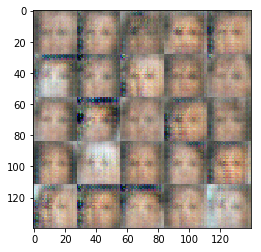

Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.5456
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.6423
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.6870


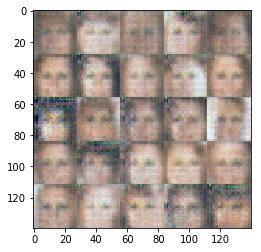

Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.6338
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.5203
Epoch 1/1... Discriminator Loss: 1.3087... Generator Loss: 0.7824
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.6864


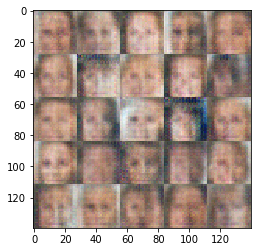

Epoch 1/1... Discriminator Loss: 1.3574... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.5307
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.7644
Epoch 1/1... Discriminator Loss: 1.4074... Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.5657


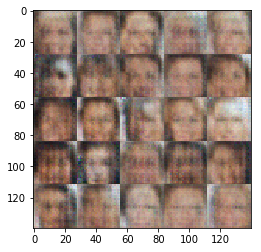

Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.5705
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.7650
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.7376
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.7255


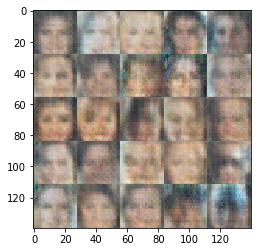

Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.4606
Epoch 1/1... Discriminator Loss: 1.2830... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 0.7815
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 1.1302
Epoch 1/1... Discriminator Loss: 1.4435... Generator Loss: 1.0151
Epoch 1/1... Discriminator Loss: 1.3410... Generator Loss: 0.7595


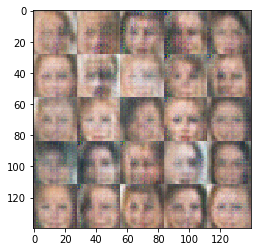

Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.7207
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.6142
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.5985


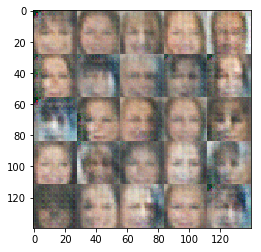

Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.5862
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.4650... Generator Loss: 0.9277
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.3153... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 0.8600


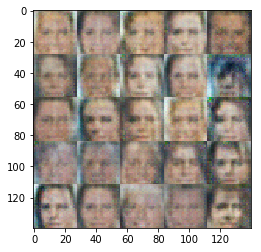

Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.2768... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 0.6145... Generator Loss: 0.8972
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.6158
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.7135
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.7621


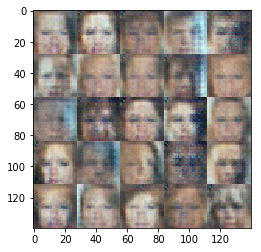

Epoch 1/1... Discriminator Loss: 1.3773... Generator Loss: 0.6337
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.6495


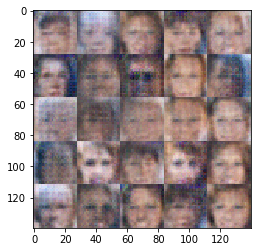

Epoch 1/1... Discriminator Loss: 0.8372... Generator Loss: 0.9929
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.7392
Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.6114


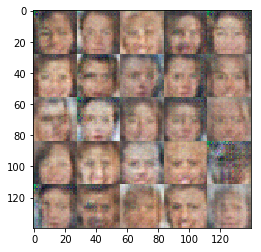

Epoch 1/1... Discriminator Loss: 1.3398... Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.2861... Generator Loss: 0.7483
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 1.5347... Generator Loss: 0.3948
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 0.7693... Generator Loss: 1.2636


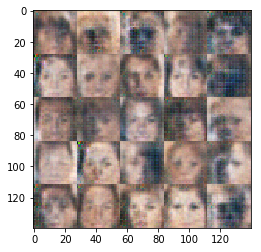

Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.8366
Epoch 1/1... Discriminator Loss: 2.4814... Generator Loss: 2.1356
Epoch 1/1... Discriminator Loss: 0.6427... Generator Loss: 0.9508
Epoch 1/1... Discriminator Loss: 1.5526... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.6698


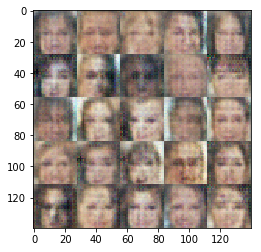

Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.6414
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.4116
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.6349
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.3444... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 1.1607


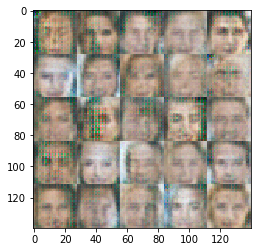

Epoch 1/1... Discriminator Loss: 3.2489... Generator Loss: 2.5506
Epoch 1/1... Discriminator Loss: 1.4867... Generator Loss: 0.8861
Epoch 1/1... Discriminator Loss: 0.9913... Generator Loss: 0.8136
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.7947


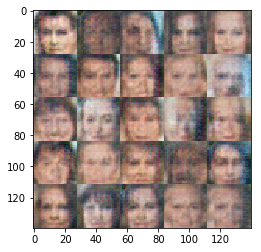

Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.5977
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.2845... Generator Loss: 0.8140
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.7357
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.6799


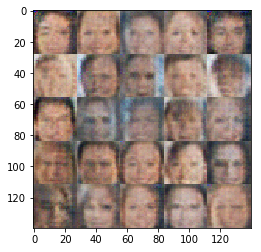

Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.4920
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 0.6044
Epoch 1/1... Discriminator Loss: 0.6756... Generator Loss: 0.9147
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.4778... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.6928


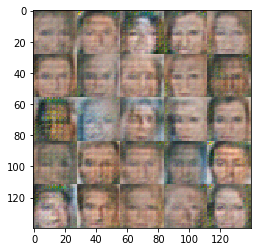

Epoch 1/1... Discriminator Loss: 1.4627... Generator Loss: 0.7241
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.8216
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.5763
Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 0.9282


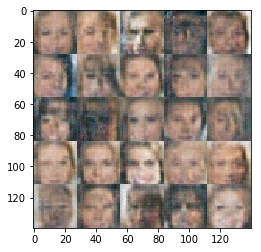

Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.4412... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.7403
Epoch 1/1... Discriminator Loss: 1.2486... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.4419
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.6963
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.7271


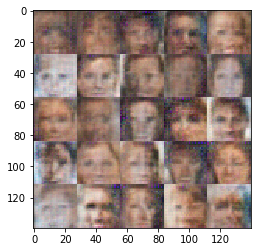

Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.6281
Epoch 1/1... Discriminator Loss: 1.3220... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.6163
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.7517


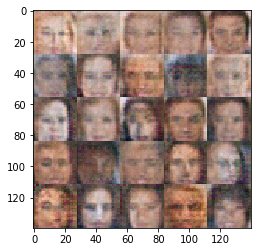

Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.7281
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.3630... Generator Loss: 0.6063
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 1.2498
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 0.5893... Generator Loss: 1.1906


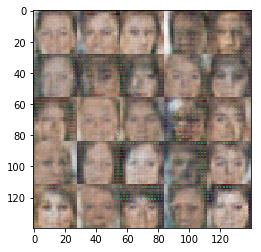

Epoch 1/1... Discriminator Loss: 1.7817... Generator Loss: 1.6521
Epoch 1/1... Discriminator Loss: 3.4934... Generator Loss: 2.9638
Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 0.7206
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.4366... Generator Loss: 0.6918


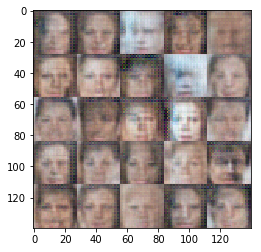

Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.7416
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.3629... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.6933


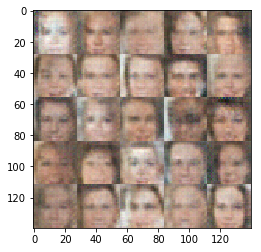

Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.6266
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.7275
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 0.7452


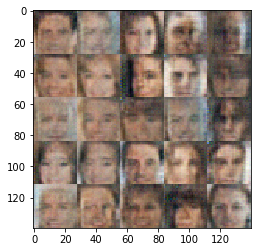

Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.6478
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 0.7181
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.6534


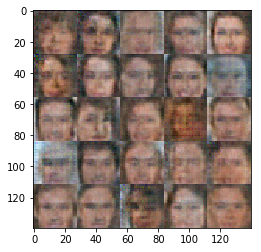

Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 1.3919... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.4516... Generator Loss: 0.5753


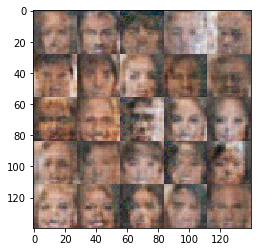

Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 0.8070
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.6647
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.6304
Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.6088


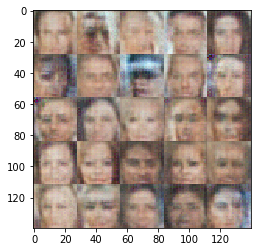

Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.6469
Epoch 1/1... Discriminator Loss: 1.4412... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 1.1654
Epoch 1/1... Discriminator Loss: 0.7699... Generator Loss: 0.9994


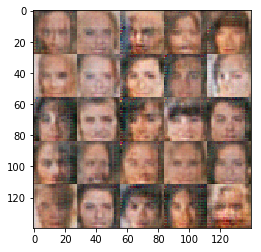

Epoch 1/1... Discriminator Loss: 1.5915... Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.7152
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.6860
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.6643
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.6619
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.7556


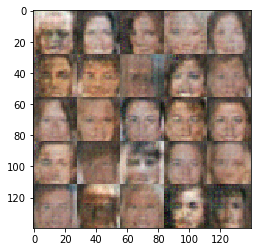

Epoch 1/1... Discriminator Loss: 1.3636... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 2.0504... Generator Loss: 1.8152
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.7914


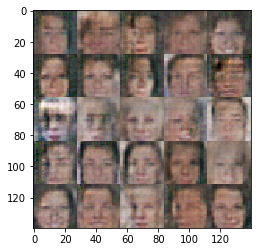

Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.4216... Generator Loss: 0.6394
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.7215


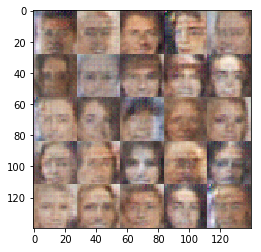

Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.6651
Epoch 1/1... Discriminator Loss: 1.4174... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.6133
Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.6799


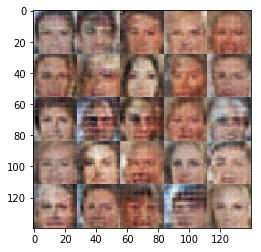

Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.3676... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.7023
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.5958


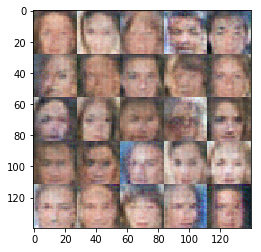

Epoch 1/1... Discriminator Loss: 1.3476... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.4973
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.7225
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.6164


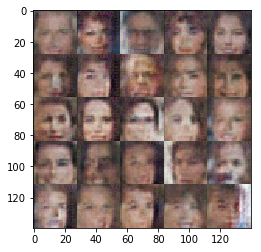

Epoch 1/1... Discriminator Loss: 1.4250... Generator Loss: 0.5941
Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 1.1020
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.7791
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 1.3026
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.6815


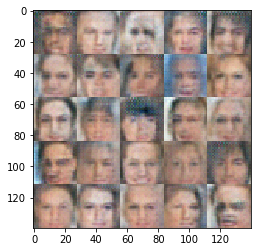

Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.5688
Epoch 1/1... Discriminator Loss: 3.9054... Generator Loss: 0.0387
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.6936


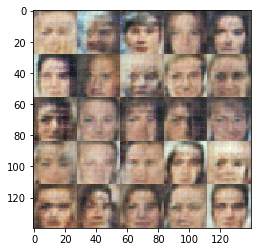

Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.8098
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.6538


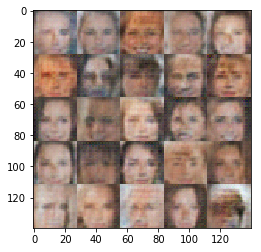

Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.6407
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.6549
Epoch 1/1... Discriminator Loss: 1.3421... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.6282
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.6863


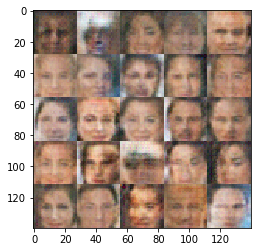

Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.5939
Epoch 1/1... Discriminator Loss: 1.3411... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.6704
Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.7765


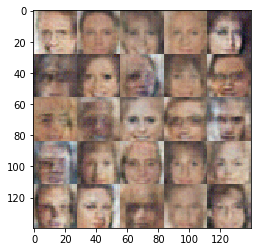

Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.7837
Epoch 1/1... Discriminator Loss: 1.3344... Generator Loss: 0.6725
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.5051
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.9374


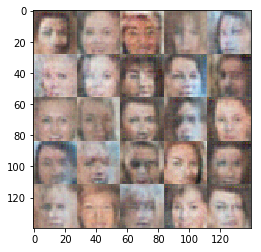

Epoch 1/1... Discriminator Loss: 1.2324... Generator Loss: 0.8740
Epoch 1/1... Discriminator Loss: 0.5876... Generator Loss: 1.3551
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.7227


In [13]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.